# Double 7's Intra (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY makes an intraday X-day low, buy.
    3. If the SPY makes an intraday X-day high, sell your long position.
    
    (optimize the number of days)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()
use_adj = False

Define high low trade periods

In [4]:
periods = range(3, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, use_adj, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,5.81,5.49,8.02,7.43,8.43,8.04,7.12,7.06,7.16,6.92,6.96,6.46,6.45
max_closed_out_drawdown,-24.02,-21.59,-17.75,-19.47,-15.99,-15.65,-18.59,-17.82,-19.19,-17.35,-17.13,-18.31,-17.88
drawdown_annualized_return,-4.13,-3.93,-2.21,-2.62,-1.90,-1.95,-2.61,-2.52,-2.68,-2.51,-2.46,-2.83,-2.77
drawdown_recovery,-0.91,-0.97,-0.80,-1.28,-0.65,-0.43,-0.25,-0.25,-1.55,-0.24,-1.62,-1.62,-1.62
best_month,11.44,10.40,10.55,11.12,12.15,12.26,13.40,13.70,14.09,14.32,14.31,10.69,10.69
worst_month,-15.52,-14.96,-14.37,-14.39,-13.43,-14.18,-16.29,-16.29,-16.28,-16.30,-16.29,-14.43,-14.45
sharpe_ratio,0.56,0.54,0.75,0.70,0.78,0.74,0.67,0.66,0.67,0.65,0.66,0.62,0.63
sortino_ratio,0.52,0.50,0.69,0.63,0.70,0.66,0.59,0.58,0.59,0.57,0.56,0.52,0.51
monthly_std,2.62,2.47,2.45,2.41,2.41,2.41,2.51,2.55,2.55,2.57,2.50,2.42,2.44
pct_time_in_market,47.71,45.93,44.68,43.64,42.87,42.36,41.89,41.46,41.00,40.41,38.60,37.46,36.35


Bar graphs

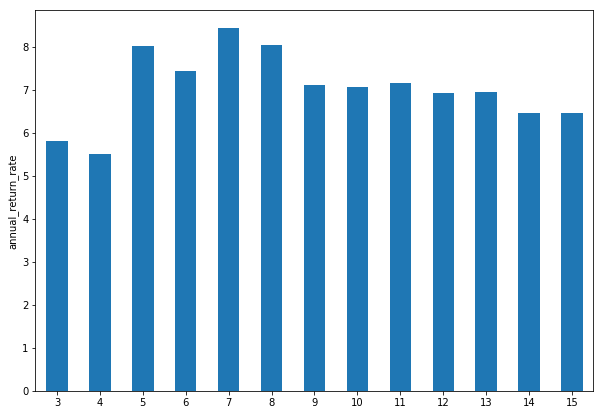

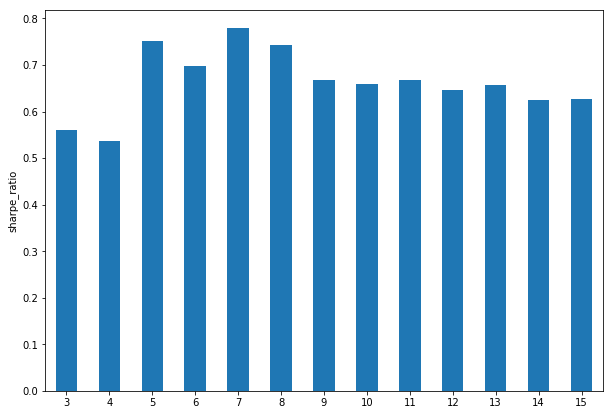

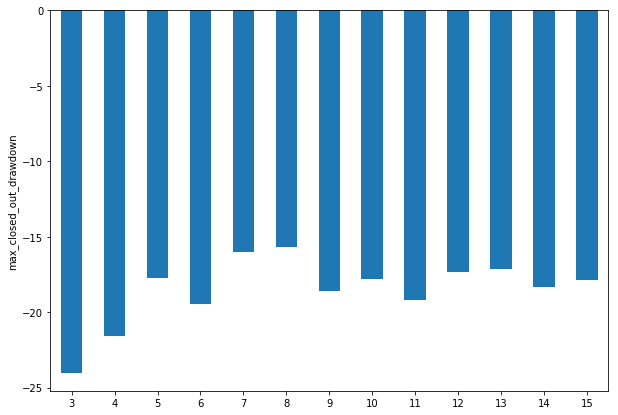

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end, s._use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1993-11-12 00:00:00 BUY  214 SPY @ 46.59
2019-07-26 00:00:00 SELL 214 SPY @ 302.01


Equity curve

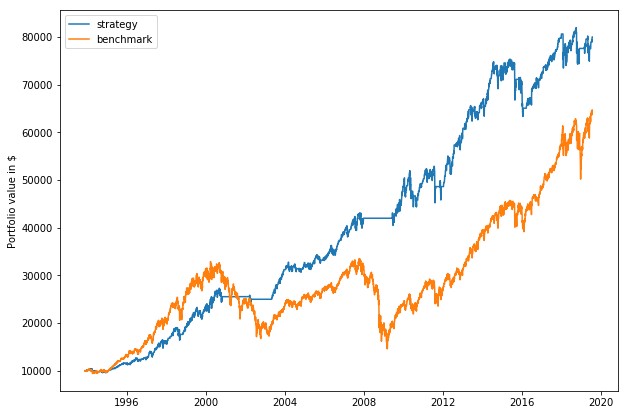

In [9]:
pf.plot_equity_curve(strategies['7'].dbal, benchmark=benchmark.dbal)